# Week 3: Linear and (polynomial) Regression 

----------------------------------------------------
Machine Learning                      

Year 2019/2020

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es* and *Pablo M. Olmos olmos@tsc.uc3m.es*

----------------------------------------------------


## Importing Packages

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Diabetes dataset

This week, let's work with the **Diabetes** dataset where, from a set of ten patient characteristics (age, sex, body mass index, mean blood pressure and six blood serum measurements), we will have to predict disease progression one year later.


### Loading and preprocessing data



Number of data: 442


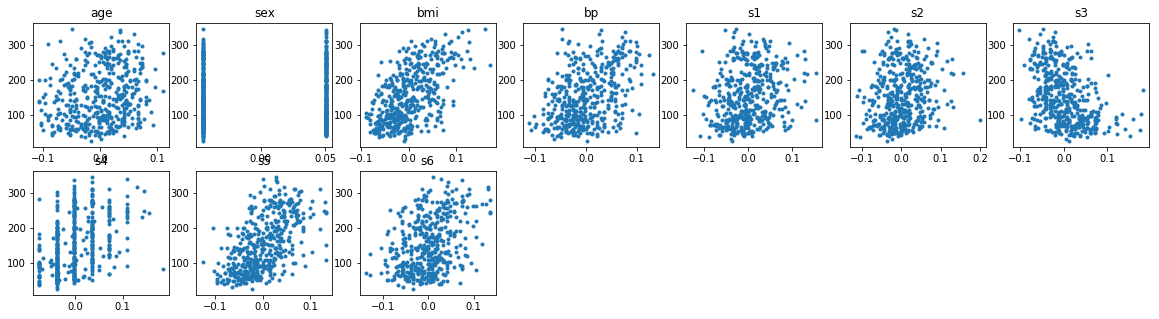

In [0]:
# Load data and analize the data
diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target
feature_names = diabetes.feature_names

print('Number of data: %s' %X.shape[0])
D = X.shape[1]

plt.figure( figsize=(20,5))
for d in range (D):
  plt.subplot(2,7,d+1)
  plt.plot(X[:,d],Y,'.',)
  plt.title(feature_names[d])

In [1]:
# Generate train and test partitions
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6, random_state=0)

# Data normalization
transformer = StandardScaler().fit(X_train)  # fit() learns mean and std parameters
X_train_norm = transformer.transform(X_train) # transform() normalizes
X_test_norm =  transformer.transform(X_test)

NameError: ignored

To facilitate the analysis and visualization of the results, from now on we are going to work with a single input variable, for this we are going to use the BMI (feature #2).

In [0]:
# Feature selection 2 (BMI)

id_feat = 2
X_train_BMI = X_train_norm[:, id_feat][:,np.newaxis]
X_test_BMI = X_test_norm[:, id_feat][:,np.newaxis]

# The linear regression model


Consider we have a **training** database of $N$ entries of the form $(\mathbf{x}^{(i)},y^{(i)})$, where $\mathbf{x}^{(i)}\in\mathbb{R}^D$ and $y^{(i)}\in\mathbb{R}$.  Each data or sample is vector of $D$ elements, $\mathbf{x}=[x_1, \ldots, x_D]$, and each one of these elements is called a **feature**.

We will use this training set to fit a **linear** model defined by:

$$f(\mathbf{x}) =  w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_D x_D, $$

where $w_0$ is called the **intercept**, and it captures the **bias** level of $y$. In the following, we will consider an extended version of the input data where we add a first entry with value equal to 1, i.e., $\mathbf{x}_e=[1, x_1, \ldots, x_D]$ so we can compactly write

$$f(\mathbf{x}) = \mathbf{w}^T\mathbf{x}_e$$

This regression model is called a **linear regression** since we approximate the target $y$ by a function defined as a linear combination of the input features.

In order to fit $\mathbf{w}$, we need to define a **cost** or **loss** function, that penalizes how much error our model makes when estimating each data in our **training** set. For this purpose, the linear regression model  uses the **average training squared error** :

$$J_{train}(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)}-\mathbf{w}^T\mathbf{x}_e^{(i)})^2$$

Thus, we have to find 

$$\mathbf{w}^* = \arg \min_{\mathbf{w}} \frac{1}{N} \sum_{i=1}^{N} (y^{(i)}-\mathbf{w}^T\mathbf{x}_e^{(i)})^2 $$

Fortunately, regardless the dimension of $\mathbf{w}$, this is a well-behaved problem that can be easily solved, since its solution is unique and presents a
closed form, known as the **least-squares** or the **normal equation**:

$$\mathbf{w}^* = (\mathbf{X}_e^T\mathbf{X}_e)^{-1}\mathbf{X}_e^T\mathbf{y},$$
where
- ${\mathbf{X}_e}_{N\times (D+1)}$ is the extended version of the training data matrix, where the $i$-th row is $\mathbf{x}_e^{(i)}= [1, x^{(i)}_1, \ldots, x^{(i)}_D]$
- $\mathbf{y}_{(N\times 1)}$ is the training target vector
- $ (\mathbf{X}_e^T\mathbf{X}_e)^{-1}\mathbf{X}_e$ is the [Moore–Penrose inverse](http://mathworld.wolfram.com/Moore-PenroseMatrixInverse.html) of $\mathbf{X}_e$.

The solution of this problem is unique due to the function $J_{train}(\mathbf{w})$ is [**convex**](http://mathworld.wolfram.com/ConvexFunction.html) w.r.t. $\mathbf{w}$, and thus it has a **unique minimum**.

---


### Exercise 1

Demonstrate that the solution to the problem 

$$\mathbf{w}^* = \arg \min_{\mathbf{w}} \frac{1}{N} \sum_{i=1}^{N} (y^{(i)}-\mathbf{w}^T\mathbf{x}_e^{(i)})^2 $$


is given by  

$$\mathbf{w}^* = (\mathbf{X}_e^T\mathbf{X}_e)^{-1}\mathbf{X}_e^T\mathbf{y},$$

### SOLUTION


#### <SOL>
#### </SOL>

### Analize the loss function

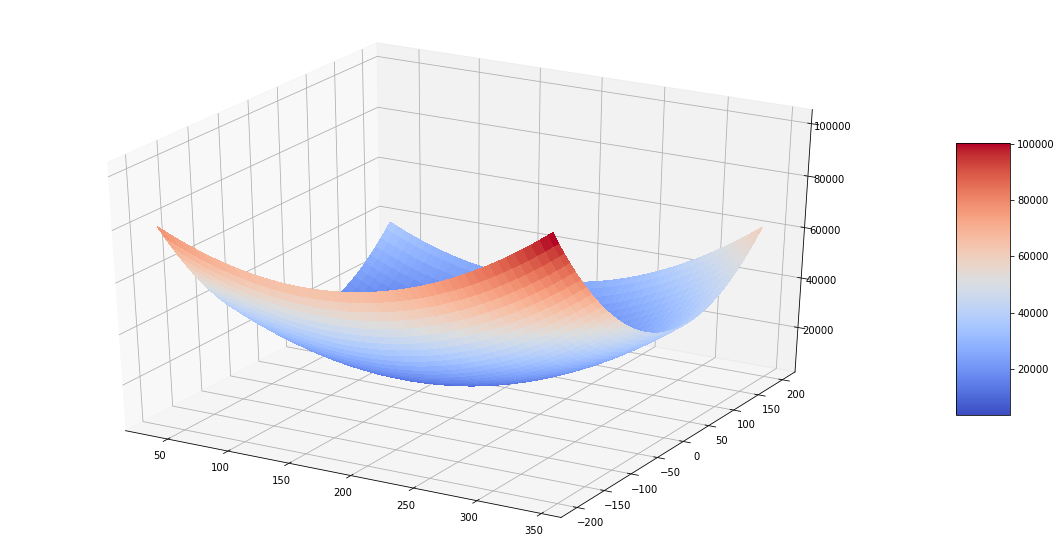

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def cost_function(w_0,w_1,y,x):
    J = np.mean((np.tile(y,(w_0.shape[0],1)).T-(x[:,0][:, np.newaxis]*w_0[:, np.newaxis].T+x[:,1][:, np.newaxis]*w_1[:, np.newaxis].T))**2,axis=0)
    return J


fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

# Make data.
w_0 = np.arange(np.min(Y_train), np.max(Y_train), (np.max(Y_train)-np.min(Y_train))/100)
w_1 = np.arange(-200, 200, 2.5)
w_0, w_1 = np.meshgrid(w_0, w_1)
J = cost_function(w_0.ravel(),w_1.ravel(),Y_train, np.concatenate((np.ones((X_train_BMI.shape[0],1)), X_train_BMI) , axis=1))
# Plot the surface.
surf = ax.plot_surface(w_0, w_1, J.reshape(w_0.shape), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


### Preparing the data

First of all, we have to create the extended versions of
training and test data

### Exercise 2.1

Create an extended training and test matrix by adding a first columns of ones. Call these new matrix as 'X_train_e' and 'X_test_e'. You can use the np.concatenate() and np.ones() methods.


### SOLUTION

In [0]:
# <SOL>
# </SOL>

## Compute LS solution

As we have seen, the LS solution is given by:

$$\mathbf{w}^* = (\mathbf{X}_e^T\mathbf{X}_e)^{-1}\mathbf{X}_e^T\mathbf{y},$$



### Exercise 2.2

Obtain the vector weigths, 'w_start', of the LS solution

### SOLUTION

# <SOL>
# </SOL>

In [0]:
# <SOL>
# </SOL>

# <SOL>
# </SOL>

### Exercise 2.3 

Finally, using the trained model, evaluate its performance over the test data and plot the regression function.

### SOLUTION

In [0]:
# <SOL>
# </SOL>

In [0]:
# <SOL>
# </SOL>

## Analyze the LS solution 

How can we improve this model? Transform the input features....

# Least Squares Solution with Polynomial Features

**Features can be a non-linear transformation of a given input!**

Note that the above model **does not** mean that we cannot use a linear regression model to interpolate a non-linear function w.r.t. to a given input. For instance, we can try to predict disease progression using the variable BMI (Body mass index) using the following set of **features**:

$$\mathbf{x} = [1,BMI ,BMI ^2,BMI ^3,\ldots,BMI ^D],$$ 

which assumes we are approximating the function $f(BMI)$ with an $D$-th order polynomial. Once the features are defined, then note that our goal is to find $\mathbf{w}\in\mathbb{R}^{D+1}$ such that
$$ f(\mathbf{x}) = \mathbf{w}^T\mathbf{x},$$
and this is still a **linear regression model**.


____

Lets go back to our running example, estimating the disease progression using the BMI value.  We will use polynomials with different order to visualize the solution. 

First, we use a $D$ order polynomial. Thus, each feature vector is 

$$\mathbf{x} = [1,BMI,BMI^2, \ldots, BMI^D]$$

Note that although we use either the normalized or the non-normalized value of $BMI$, after computing the polynomial terms ($BMI^2$, ...), we normalize all new features again! Try to think about why is that ...

### Exercise 3

Next cell implements the function learnPolyLR(), which trains a polynomial regression model, and it returns the model weights together to its training and test MSE.

Check as this function let's you include the polynomial degree and, by means of the sklearn [PolynomialFeatures()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) function, it  obtains the polynomial extension of a data matrix. Then, normalize the data and trains the model. Finally, let you plot the regression funcion (this is only working for unidimensional input data).

Use this function to train a polynomial model of degree 2, 5 and 10 using as input the feature #2 (BMI).

In [0]:
from sklearn.preprocessing import PolynomialFeatures

def learnPolyLR(X_train, Y_train, X_test, Y_test, n_degree, addPlot=True):
  
  # Create polynomial version of training and test data (it includes the bias)
  polynomial_features = PolynomialFeatures(degree=n_degree,include_bias=True)
  
  X_train_pol = polynomial_features.fit_transform(X_train)
  X_test_pol = polynomial_features.transform(X_test)


  # Data normalization
  transformer = StandardScaler().fit(X_train_pol[:,1:])  # fit() learns mean and std
  # The first column is the vector of ones, we do not normalize it!!!
  X_train_pol[:,1:] = transformer.transform(X_train_pol[:,1:])
  X_test_pol[:,1:] =  transformer.transform(X_test_pol[:,1:])

  # Compute LS solution
  w_star = np.linalg.lstsq(X_train_pol, Y_train, rcond=None )[0]
  
  # Evaluate train error
  f_tr =X_train_pol @ w_star
  MSE_train = np.mean((Y_train-f_tr)**2)
  
  # Evaluate test error
  f_test=X_test_pol @ w_star
  MSE_test = np.mean((Y_test-f_test)**2)
  
  if addPlot:
    X_min = np.min(X_train)
    X_max = np.max(X_train)
    X_plot = np.arange (X_min,X_max,0.001)[:,np.newaxis] # This is not data! Just to visualize the polynomial curve

    X_plot_pol = polynomial_features.transform(X_plot)
    
    # Data normalization
    X_plot_pol[:,1:] =  transformer.transform(X_plot_pol[:,1:])

    # Compute the regression curve output
    f_plot= X_plot_pol @ w_star

    # Plot the regression polynomial
    plt.figure()
    plt.plot(X_plot,f_plot)
    plt.plot(X_train, Y_train, '.r')
    plt.ylim(-400,400)

  return w_star, MSE_train, MSE_test


#### SOLUTION


In [0]:
# <SOL>
# </SOL>

# Learning curves

Learning curves analyze the performance evaluation according the number of training data is increased and they are a very powerfull and informative methodology to understand if your regression model is exposed to **overfitting** or is too simple, i.e., it is **too biased**.

To plot the learning curves for a regression model with $N$ training points and $Ntest$ test points, we plot the error and test averagre MSE for different **subset sizes of training points**. More precisely, for $N_0\leq N$, we compute:
$\mathbf{w}^*$
$$J_{train}(\mathbf{w}^*,N_0) = \frac{1}{N_0} \sum_{i=1}^{N_0} (y^{(i)}-{\mathbf{w}^*}^T\overline{\mathbf{x}}^{(i)})^2$$
and
$$J_{test}(\mathbf{w}^*) = \frac{1}{N_{Test}} \sum_{i=1}^{N_{Test}} (y^{(i)}-{\mathbf{w}^*}^T\tilde{\mathbf{x}}^{(i)})^2$$
where $\mathbf{w}^*$ is the LS solution for a subset of training points of size $N_0\leq N$. In general, both quantities above **must** be averaged for different subsets.

Now, let's plot the learning curves for the above polynomial regression model using different polynomial degrees to understand what they mean.

## Model 1: An example of bias

Imagine we use a polynomial of degree 1, i.e., a straight line to estimate the disease evolution from the BMI. Lets compute and plot the learning curves.

In [0]:
n_degree = 1
n_iter = 20

N = X_train.shape[0]
N0_values = np.arange(10, N, 10)

MSE_train_all = np.zeros((n_iter,N0_values.shape[0])) 
MSE_test_all = np.zeros((n_iter,N0_values.shape[0]))

for n, N0 in enumerate(N0_values): 
  for iter in range(n_iter):
    pos_rand = np.random.permutation(N)
    X_train_N0= X_train_BMI[pos_rand[:N0],:]
    Y_train_N0= Y_train[pos_rand[:N0]]
    w_star, MSE_train, MSE_test = learnPolyLR(X_train_N0, Y_train_N0, X_test_BMI, Y_test, n_degree, addPlot=False)
    MSE_train_all [iter, n] = MSE_train
    MSE_test_all [iter, n] = MSE_test
    
# Average the results
MSE_train1 = np.mean(MSE_train_all, axis=0)
MSE_test1 = np.mean(MSE_test_all, axis=0)

# plot the result
plt.semilogy(N0_values,MSE_train1 ,'b-o',ms=10,label='MSE_train (degree 1)')
plt.semilogy(N0_values,MSE_test1 ,'b--<',ms=10,label='MSE_test (degree 1)')
plt.xlabel('Number of training points')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model polynomial order regression  = %d' %(n_degree))
plt.legend()
plt.rcParams["figure.figsize"] = [12,4]


## Model 2: An example of mild overfitting

Imagine now we use a polynomial of degree 5. Lets compute and plot the learning curves.

In [0]:
n_degree = 5
n_iter = 20

N = X_train.shape[0]
N0_values = np.arange(10, N, 10)

MSE_train_all = np.zeros((n_iter,N0_values.shape[0])) 
MSE_test_all = np.zeros((n_iter,N0_values.shape[0]))

for n, N0 in enumerate(N0_values): 
  for iter in range(n_iter):
    pos_rand = np.random.permutation(N)
    X_train_N0= X_train_BMI[pos_rand[:N0],:]
    Y_train_N0= Y_train[pos_rand[:N0]]
    w_star, MSE_train, MSE_test = learnPolyLR(X_train_N0, Y_train_N0, X_test_BMI, Y_test, n_degree, addPlot=False)
    MSE_train_all [iter, n] = MSE_train
    MSE_test_all [iter, n] = MSE_test
    
# Average the results
MSE_train5 = np.mean(MSE_train_all, axis=0)
MSE_test5 = np.mean(MSE_test_all, axis=0)

# plot the result
plt.semilogy(N0_values,MSE_train1 ,'b-o',ms=10,label='MSE_train (degree 1)')
plt.semilogy(N0_values,MSE_test1 ,'b--<',ms=10,label='MSE_test (degree 1)' )
plt.semilogy(N0_values,MSE_train5 ,'r-o',ms=10,label='MSE_train (degree 5)')
plt.semilogy(N0_values,MSE_test5 ,'r--<',ms=10,label='MSE_test (degree 5)')
plt.xlabel('Number of training points')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model polynomial order regression  = %d' %(n_degree))
plt.legend()
plt.rcParams["figure.figsize"] = [12,4]

## Model 3: An example of extreme overfitting

Imagine now we use a polynomial of degree 40. Lets compute and plot the learning curves.

In [0]:
n_degree = 10
n_iter = 20

N = X_train.shape[0]
N0_values = np.arange(10, N, 10)

MSE_train_all = np.zeros((n_iter,N0_values.shape[0])) 
MSE_test_all = np.zeros((n_iter,N0_values.shape[0]))

for n, N0 in enumerate(N0_values): 
  for iter in range(n_iter):
    pos_rand = np.random.permutation(N)
    X_train_N0= X_train_BMI[pos_rand[:N0],:]
    Y_train_N0= Y_train[pos_rand[:N0]]
    w_star, MSE_train, MSE_test = learnPolyLR(X_train_N0, Y_train_N0, X_test_BMI, Y_test, n_degree, addPlot=False)
    MSE_train_all [iter, n] = MSE_train
    MSE_test_all [iter, n] = MSE_test
    
# Average the results
MSE_train10 = np.mean(MSE_train_all, axis=0)
MSE_test10 = np.mean(MSE_test_all, axis=0)

# plot the result
plt.semilogy(N0_values,MSE_train1 ,'b-o',ms=10,label='MSE_train (degree 1)')
plt.semilogy(N0_values,MSE_test1 ,'b--<',ms=10,label='MSE_test (degree 1)')
plt.semilogy(N0_values,MSE_train5 ,'r-o',ms=10,label='MSE_train (degree 5)')
plt.semilogy(N0_values,MSE_test5 ,'r--<',ms=10,label='MSE_test (degree 5)')
plt.semilogy(N0_values,MSE_train10 ,'g-o',ms=10,label='MSE_train (degree 10)')
plt.semilogy(N0_values,MSE_test10 ,'g--<',ms=10,label='MSE_test (degree 10)')
plt.xlabel('Number of training points')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model polynomial order regression  = %d' %(n_degree))
plt.legend()
plt.rcParams["figure.figsize"] = [12,4]

What do you conclude from the plot above? How does the model improve as we increase the number of training points? 

**Conclusion: We can reduce the overfitting problem increasing the number of training data**



# Model regularization

We have seen that complex models tend to **overfit** the data **unless we are able to increase the number of training points**, which is many times not an option.

However, if we analyze the weights of overfitted models, we can realize that they tend to show regression coefficients with very large absolute values. Examine the output of the following cell...

In [0]:
deg_list = [1,5,10,15,20,25]

plt.figure()

for i,deg in enumerate(deg_list):
  
    w_star, MSE_train, MSE_test= learnPolyLR(X_train_BMI, Y_train, X_test_BMI, Y_test, deg)
    
    plt.subplot(2,3,i+1)
    
    plt.stem(w_star)
    plt.title('Degree % d, MSEtest = %2.0f' %(deg,MSE_test))
    
plt.show()   

In model regularization, we combine the flexibility of a **complex model** with a **penalization function** that prevents the model to converge to solutions with very large coefficients.

The easiest regularization example is the $L_2$ penalization or **Ridge regression**:

$$\mathbf{w}_\lambda = \arg \min_{\mathbf{w}} \frac{1}{N} \left[\sum_{i=1}^{N} (y^{(i)}-\mathbf{w}^T\mathbf{x}^{(i)})^2 + \lambda \sum_{j=1}^{D} {w}_j^2\right],$$

where note we do not penalize large values of the intercept $w_0$, since it essentially captures the mean of $y$. Also, $\lambda$ is called the **regularization parameter** and it is another parameter that **we have to learn from our data**, looking for right balance between **explaining our training set** and **the penalization term**.

Fortunately, the $L2$ penalization norm does not change the convexity of the loss function and, indeed, we still have a **closed-form** solution

$$\mathbf{w}_\lambda = (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I}_{D\times D})^{-1}\mathbf{X}^T\mathbf{y},$$

Note that the term $\lambda \mathbf{I}_{D\times D}$ ensures in general that the matrix $\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I}$ is invertible, leading to much better condition solutions.

In any case, scikit-learn has a function ([linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)) that allows us to do the training and evaluation of a ridge regression model. 

Next cell has adapted the previous function (learnPolyLR) to train a polynomial model for the ridge regression case.




In [0]:
from sklearn.linear_model import Ridge

def learnPolyLR_L2(X_train, Y_train, X_test, Y_test, n_degree, lamb):


  # Select id_feat and create polynomial version of training and test data
  Ntr = X_train.shape[0]
  Ntst = X_test.shape[0]

  # We are not using the columns of ones anymore
  polynomial_features = PolynomialFeatures(degree=n_degree, include_bias=False)
  
  X_train_pol = polynomial_features.fit_transform(X_train)
  X_test_pol = polynomial_features.transform(X_test)


  # Data normalization
  transformer = StandardScaler().fit(X_train_pol)  # fit() learns mean and std
 
  X_train_pol = transformer.transform(X_train_pol)
  X_test_pol =  transformer.transform(X_test_pol)

 
  # Compute Ridge Regression solution
  clf = Ridge(alpha=lamb, fit_intercept=True) # We add the intercept here (the columns of ones)
  clf.fit(X_train_pol, Y_train) 
  
  # Save weight values
  w_star = np.zeros((X_train_pol.shape[1]+1,))
  w_star[0] = clf.intercept_
  w_star[1:] = clf.coef_
  
 
  # Evaluate train error
  f_tr = clf.predict(X_train_pol)
  MSE_train = np.mean((Y_train-f_tr)**2)
  
  
  # Evaluate test error
  f_test= clf.predict(X_test_pol)
  MSE_test = np.mean((Y_test-f_test)**2)

  return w_star, MSE_train, MSE_test


### Exercise 4

Use the above function to train a polynomial ridge regression model (degree 10) and analyze its performance and the regression coefficient values for the following range of $\lambda$ values:
 $\lambda = [1, 5, 10, 50, 100, 500]$. You can try to plot the train and test MSE, as well as the weight evolution for different values of $\lambda$.


#### SOLUTION

In [0]:
# <SOL>
# </SOL>  
  

Note that the final result depends on the value of $\lambda$ that we are using. How can we select its optimum value?

# The Lasso

The lasso is a shrinkage method like ridge, but the L2 ridge penalty is replaced by the L1 penalty (known as LASSO, Least Absolute Shrinkage and Selection Operator). So, the Lasso model is defined by the following optimization problem


$$\mathbf{w}_\lambda = \arg \min_{\mathbf{w}} \frac{1}{N} \left[\sum_{i=1}^{N} (y^{(i)}-\mathbf{w}^T\mathbf{x}^{(i)})^2 + \lambda \sum_{j=1}^{D} | w_j|\right],$$

This latter constraint makes the solutions nonlinear in $\mathbf{w}$ (the absolute value has a discontinous derivative), and there is no closed form expression as in ridge regression (even, unique minimum is no more guarantee). However, we can compute the lasso solution using the sklearn implementation [linear_model.Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) which is based in [stochastic gradient descent algorithm](https://en.wikipedia.org/wiki/Stochastic_gradient_descent).

Check how next cell has now adapted the learnPolyLR function to train a polynomial model for the lasso regression case.






In [0]:
from sklearn.linear_model import Lasso

def learnPolyLR_L1(X_train, Y_train, X_test, Y_test, n_degree, lamb):


  # Select id_feat and create polynomial version of training and test data
  Ntr = X_train.shape[0]
  Ntst = X_test.shape[0]

  # We are not using the columns of ones anymore
  polynomial_features = PolynomialFeatures(degree=n_degree, include_bias=False)
  
  X_train_pol = polynomial_features.fit_transform(X_train)
  X_test_pol = polynomial_features.transform(X_test)


  # Data normalization
  transformer = StandardScaler().fit(X_train_pol)  # fit() learns mean and std
 
  X_train_pol = transformer.transform(X_train_pol)
  X_test_pol =  transformer.transform(X_test_pol)

 
  # Compute Lasso Regression solution
  clf = Lasso(alpha=lamb, fit_intercept=True) # We add the intercept here (the columns of ones)
  clf.fit(X_train_pol, Y_train) 
  
  # Save weight values
  w_star = np.zeros((X_train_pol.shape[1]+1,))
  w_star[0] = clf.intercept_
  w_star[1:] = clf.coef_
  
 
  # Evaluate train error
  f_tr = clf.predict(X_train_pol)
  MSE_train = np.mean((Y_train-f_tr)**2)
  
  
  # Evaluate test error
  f_test= clf.predict(X_test_pol)
  MSE_test = np.mean((Y_test-f_test)**2)

  return w_star, MSE_train, MSE_test

### Exercise 5

Repeat Exercise 1, but training a lasso regression model instead of the ridge one. Analyze again the train and test MSE evolution and the weight values. 
For this case use the $\lambda$ value range:
 $\lambda = [0.001,0.005, 0.01,0.05,0.1, 0.5,1, 5, 10, 50, 100]$

#### SOLUTION

In [0]:
# <SOL>
# </SOL>

Note that this constraint has an interesting property, since making $\lambda$ sufficiently large we can cause some of the coefficients drop to zero. Thus, the L1 regularization does a kind of feature selection. For this reason, this regularization is known as LASSO (Least Absolute Shrinkage and Selection Operator).

At the light of this result, if you could only use 5 of the 10 polynomial terms, which would you choose?

## More on L2 and L1 regularization

Both Ridge  and Lasso regression problems can be reformulated as a least squares optimization problem plus a constraint, that is,

* **Ridge regression**:

$$\mathbf{w}^* = \arg \min_{\mathbf{w}} \frac{1}{N} \sum_{i=1}^{N} (y^{(i)}-\mathbf{w}^T\mathbf{x}^{(i)})^2 $$
$$ {\rm s.t.} \sum_{j=1}^{D} {w}_j^2 \leq t$$

* **Lasso regression**:


$$\mathbf{w}^*= \arg \min_{\mathbf{w}} \frac{1}{N} \sum_{i=1}^{N} (y^{(i)}-\mathbf{w}^T\mathbf{x}^{(i)})^2 $$
$$ {\rm s.t.} \sum_{j=1}^{D} | w_j| \leq t$$

In this way we can see that these problems are really minimizing the mean squared error and, at the same time, they are forcing the values of $\mathbf{w}$ to be within the region defined by the constraint. In the case of L2, this constraint forces $\mathbf{w}$ to fall inside a sphere of radius $\sqrt{t}$ and in the case of L1 this region is a diamond of side $\sqrt{2}t$. Next figure (from [1]) depicts these optimization problems for a two dimensional problem (the lasso on the left and ridge regression on the right).

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/vL1_l2.png" width="50%" > 

Note that both methods find the optimal solution where the elliptical contours (mean squared error) hit the constraint region. However, the lasso constraint has corners and when the solution falls into a corner, the value of $w_j$ becomes zero. When there are many input dimensions, the diamond becomes a rhomboid with many corners, flat edges and faces, increasing the chances for the estimated parameters to be zero.






# The Elastic-Net

This is another regularized linear model that emerges as a combination of  L1 and L2 penaties:


$$\mathbf{w}_\lambda = \arg \min_{\mathbf{w}} \frac{1}{N} \left[\sum_{i=1}^{N} (y^{(i)}-\mathbf{w}^T\mathbf{x}^{(i)})^2 + \lambda_1\sum_{j=1}^{D+1} | w_j|+ \lambda_2\sum_{j=1}^{D+1} w_j^2\right],$$

If you want to try this model, you can check the sklearn implementantion:  [linear_model.ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)


# Some useful references:

[1] C. M. Bishop, [Pattern Recognition and Machine Learning](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf), Chapter 3: Linear Models for regression. Springer, 2006.


More on L1 and L2 regularization:
* Regularización L1 vs L2:[videolecture](https://www.youtube.com/watch?v=sO4ZirJh9ds)
* [Ordinary Least Squares and Ridge Regression Variance](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html#sphx-glr-auto-examples-linear-model-plot-ols-ridge-variance-py)
* Compute [elastic net path with coordinate descent](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py)
* [LARS](https://scikit-learn.org/stable/modules/linear_model.html#least-angle-regression  
https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html#sphx-glr-auto-examples-linear-model-plot-lasso-lars-py)

* [Huber loss](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.HuberRegressor)